![Logo Recolto](https://recolto.netlify.app/assets/logo_recolto_blanc.png)

Ce notebook a pour objectif d'explorer les fichiers GeoJSON des départements français avec les DOM-TOM. 

Auteur: Pierrick BERTHE

Source : https://france-geojson.gregoiredavid.fr/

Objectif :
- Lire les fichiers GeoJSON des départements français
- Isoler les DOM-TOM
- Comprendre la structure des fichiers GeoJSON
- Visualiser les départements français sur une carte

In [1]:
# General imports
import os
import sys
import time
from datetime import datetime

# Geographical imports
import geopandas as gpd

# Data manipulation imports
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

# Versions
print("Interpréteur python :")
print("Python        : " + sys.version + "\n")
print("Version des librairies utilisées :")
print("Geopandas    : " + gpd.__version__)
print("Matplotlib   : " + mlp.__version__)
print("Pandas       : " + pd.__version__)

# Afficher heure lancement
maintenant = datetime.now().isoformat()
print("\nCode lance le : " + maintenant)

# Enregistrer l'heure de debut
start_time = time.time()

# Vérifiez le répertoire de travail actuel
print("\nCurrent working directory:", os.getcwd())

Interpréteur python :
Python        : 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]

Version des librairies utilisées :
Geopandas    : 1.0.1
Matplotlib   : 3.10.0
Pandas       : 2.2.3

Code lance le : 2025-02-21T17:42:17.290590

Current working directory: c:\Users\pierr\VSC_Projects\Recolto\scripts\notebooks


# <span style='background:grey'>Paramètres d'affichage</span>

In [2]:
# nombre ligne, col et chiffre apres la virgule
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 10)
pd.set_option("display.precision", 2)

# <span style='background:grey'>Fonction</span>

In [3]:
def format_multipolygon(multipolygon):
    """
    Display a multipolygon in a formatted string.

    :param multipolygon: the multipolygon to display
    :return: formatted_str: _description in string_
    """
    # Initialize the formatted string
    formatted_str = "MULTIPOLYGON (\n"

    # Add the polygons
    for polygon in multipolygon.geoms:
        formatted_str += "    (\n"
        formatted_str += "        (\n"
        for coord in polygon.exterior.coords:
            formatted_str += f"            {coord[0]} {coord[1]},\n"
        formatted_str = formatted_str.rstrip(",\n") + "\n"
        formatted_str += "        ),\n"
        formatted_str += "    ),\n"

    # Remove the last comma and add the closing parenthesis
    formatted_str = formatted_str.rstrip(",\n") + "\n"
    formatted_str += ")"

    return formatted_str

In [4]:
def multipolygon_count(multipolygon):
    """
    Display the number of polygons and the number of coordinates in each
    polygon in a multipolygon.

    :param multipolygon: the multipolygon to display
    :return: formatted_str: number of polygons and coordinates in the
    multipolygon
    """
    # Initialize the formatted string
    formatted_str = f"Nombre de polygones: {len(multipolygon.geoms)}\n\n"

    # Initialize the coordinate count
    coord_count = 0
    
    # Add the polygons
    for i, polygon in enumerate(multipolygon.geoms, start=1):
        num_coords = len(polygon.exterior.coords)
        formatted_str += f"Polygone {i}: {num_coords} coordonnées\n"
        coord_count += num_coords
    
    # Add the total number of coordinates
    formatted_str += f"\nNombre total de coordonnées: {coord_count}"

    return formatted_str

# <span style='background:grey'>Importation des données</span>

Importation fichier GeoJSON des départements français

In [5]:
# path to JSON File
if os.getcwd().endswith("notebooks"):
    folder_path = "../../public/data/FRANCE_DOM_GEOJSON"
    os.chdir(folder_path)
    print("New working directory:", os.getcwd())
else:
    pass
    print("Current working directory:", os.getcwd())

# Define the filenames
domtom_geojson_filename = "departements-avec-outre-mer.geojson"

# Load the files
france_dom_tom_gdf = gpd.read_file(domtom_geojson_filename)

New working directory: c:\Users\pierr\VSC_Projects\Recolto\public\data\FRANCE_DOM_GEOJSON


# <span style='background:blue'>1/ Isolement DOM-TOM</span>

In [6]:
display(france_dom_tom_gdf)

,code,nom,geometry
0,971,Guadeloupe,"MULTIPOLYGON (((-61.79038 16.16682, -61.79164 ..."
1,972,Martinique,"MULTIPOLYGON (((-60.86733 14.38867, -60.86802 ..."
2,973,Guyane,"MULTIPOLYGON (((-53.87049 5.74494, -53.86464 5..."
3,976,Mayotte,"MULTIPOLYGON (((45.04101 -12.64686, 45.04139 -..."
4,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
...,...,...,...
96,92,Hauts-de-Seine,"POLYGON ((2.29097 48.95097, 2.29162 48.95077, ..."
97,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.55814 49.01201, ..."
98,94,Val-de-Marne,"POLYGON ((2.3319 48.81701, 2.33371 48.81677, 2..."
99,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ..."


Nous isolons les DOM-TOM (code département contenant "97")

In [7]:
dom_tom_gdf = france_dom_tom_gdf[france_dom_tom_gdf["code"].str.contains("97")]
dom_tom_gdf = dom_tom_gdf.sort_values(by="code").reset_index(drop=True)
display(dom_tom_gdf)

,code,nom,geometry
0,971,Guadeloupe,"MULTIPOLYGON (((-61.79038 16.16682, -61.79164 ..."
1,972,Martinique,"MULTIPOLYGON (((-60.86733 14.38867, -60.86802 ..."
2,973,Guyane,"MULTIPOLYGON (((-53.87049 5.74494, -53.86464 5..."
3,974,La Réunion,"MULTIPOLYGON (((55.56891 -21.3767, 55.56843 -2..."
4,976,Mayotte,"MULTIPOLYGON (((45.04101 -12.64686, 45.04139 -..."


# <span style='background:blue'>2/ Exploration DOM-TOM</span>

## <span style='background:green'>a/ Guadeloupe</span>

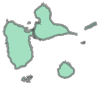

In [8]:
gdf_analyzed = dom_tom_gdf["geometry"][0]
gdf_analyzed

In [9]:
print(format_multipolygon(gdf_analyzed))

MULTIPOLYGON (
    (
        (
            -61.79038 16.16682,
            -61.79164 16.1671,
            -61.79197 16.16791,
            -61.79056 16.16935,
            -61.78957 16.16975,
            -61.78817 16.16911,
            -61.78771 16.16843,
            -61.78809 16.16735,
            -61.78958 16.16763,
            -61.79038 16.16682
        ),
    ),
    (
        (
            -61.60694 15.8344,
            -61.6076 15.83441,
            -61.60992 15.83591,
            -61.61047 15.83691,
            -61.61205 15.83841,
            -61.61134 15.83954,
            -61.61037 15.83872,
            -61.60963 15.83713,
            -61.60843 15.83581,
            -61.60712 15.83535,
            -61.60694 15.8344
        ),
    ),
    (
        (
            -61.63356 15.83977,
            -61.63593 15.8415,
            -61.63682 15.84142,
            -61.6398 15.84333,
            -61.64319 15.84485,
            -61.6465 15.84676,
            -61.64915 15.8475,
            -61

In [10]:
print(multipolygon_count(gdf_analyzed))

Nombre de polygones: 23

Polygone 1: 10 coordonnées
Polygone 2: 11 coordonnées
Polygone 3: 60 coordonnées
Polygone 4: 26 coordonnées
Polygone 5: 141 coordonnées
Polygone 6: 12 coordonnées
Polygone 7: 24 coordonnées
Polygone 8: 98 coordonnées
Polygone 9: 18 coordonnées
Polygone 10: 6 coordonnées
Polygone 11: 17 coordonnées
Polygone 12: 250 coordonnées
Polygone 13: 26 coordonnées
Polygone 14: 7 coordonnées
Polygone 15: 7 coordonnées
Polygone 16: 6 coordonnées
Polygone 17: 5 coordonnées
Polygone 18: 5 coordonnées
Polygone 19: 5 coordonnées
Polygone 20: 824 coordonnées
Polygone 21: 803 coordonnées
Polygone 22: 12 coordonnées
Polygone 23: 5 coordonnées

Nombre total de coordonnées: 2378


## <span style='background:green'>b/ Martinique</span>

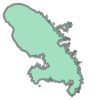

In [11]:
gdf_analyzed = dom_tom_gdf["geometry"][1]
gdf_analyzed

In [12]:
# print(format_multipolygon(gdf_analyzed))

In [13]:
print(multipolygon_count(gdf_analyzed))

Nombre de polygones: 27

Polygone 1: 8 coordonnées
Polygone 2: 7 coordonnées
Polygone 3: 13 coordonnées
Polygone 4: 5 coordonnées
Polygone 5: 5 coordonnées
Polygone 6: 7 coordonnées
Polygone 7: 7 coordonnées
Polygone 8: 9 coordonnées
Polygone 9: 5 coordonnées
Polygone 10: 23 coordonnées
Polygone 11: 9 coordonnées
Polygone 12: 10 coordonnées
Polygone 13: 8 coordonnées
Polygone 14: 7 coordonnées
Polygone 15: 14 coordonnées
Polygone 16: 7 coordonnées
Polygone 17: 6 coordonnées
Polygone 18: 6 coordonnées
Polygone 19: 5 coordonnées
Polygone 20: 5 coordonnées
Polygone 21: 2096 coordonnées
Polygone 22: 37 coordonnées
Polygone 23: 15 coordonnées
Polygone 24: 9 coordonnées
Polygone 25: 7 coordonnées
Polygone 26: 8 coordonnées
Polygone 27: 6 coordonnées

Nombre total de coordonnées: 2344


## <span style='background:green'>c/ Guyane</span>

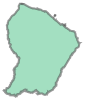

In [14]:
gdf_analyzed = dom_tom_gdf["geometry"][2]
gdf_analyzed

In [15]:
# print(format_multipolygon(gdf_analyzed))

In [16]:
print(multipolygon_count(gdf_analyzed))

Nombre de polygones: 6

Polygone 1: 11 coordonnées
Polygone 2: 5 coordonnées
Polygone 3: 4 coordonnées
Polygone 4: 1814 coordonnées
Polygone 5: 5 coordonnées
Polygone 6: 4 coordonnées

Nombre total de coordonnées: 1843


## <span style='background:green'>d/ La Réunion</span>

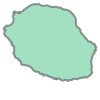

In [17]:
gdf_analyzed = dom_tom_gdf["geometry"][3]
gdf_analyzed

In [18]:
# print(format_multipolygon(gdf_analyzed))

In [19]:
print(multipolygon_count(gdf_analyzed))

Nombre de polygones: 2

Polygone 1: 5 coordonnées
Polygone 2: 872 coordonnées

Nombre total de coordonnées: 877


## <span style='background:green'>e/ Mayotte</span>

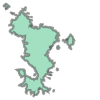

In [20]:
gdf_analyzed = dom_tom_gdf["geometry"][4]
gdf_analyzed

In [21]:
# print(format_multipolygon(gdf_analyzed))

In [22]:
print(multipolygon_count(gdf_analyzed))

Nombre de polygones: 29

Polygone 1: 179 coordonnées
Polygone 2: 23 coordonnées
Polygone 3: 24 coordonnées
Polygone 4: 70 coordonnées
Polygone 5: 6 coordonnées
Polygone 6: 15 coordonnées
Polygone 7: 30 coordonnées
Polygone 8: 12 coordonnées
Polygone 9: 48 coordonnées
Polygone 10: 32 coordonnées
Polygone 11: 19 coordonnées
Polygone 12: 4 coordonnées
Polygone 13: 5 coordonnées
Polygone 14: 8 coordonnées
Polygone 15: 7 coordonnées
Polygone 16: 5 coordonnées
Polygone 17: 5 coordonnées
Polygone 18: 50 coordonnées
Polygone 19: 57 coordonnées
Polygone 20: 23 coordonnées
Polygone 21: 13 coordonnées
Polygone 22: 5 coordonnées
Polygone 23: 5 coordonnées
Polygone 24: 5400 coordonnées
Polygone 25: 508 coordonnées
Polygone 26: 139 coordonnées
Polygone 27: 31 coordonnées
Polygone 28: 42 coordonnées
Polygone 29: 16 coordonnées

Nombre total de coordonnées: 6781


# <span style='background:blue'>3/ Affichage graphique</span>

Nous affichons les DOM-TOM sur une carte (sans fond de carte)

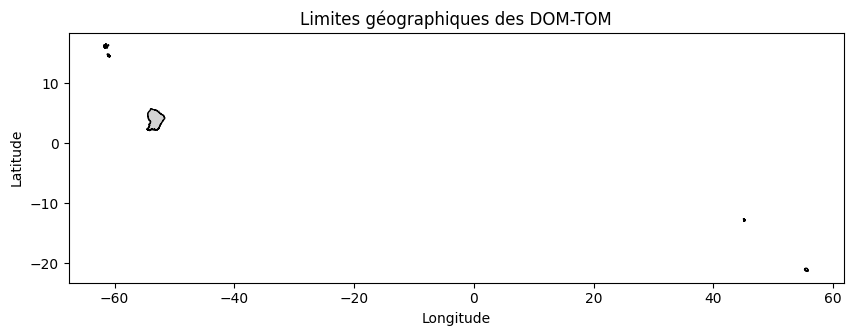

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
dom_tom_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

plt.title("Limites géographiques des DOM-TOM")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

<div class="alert alert-block alert-success"><b>Bilan: </b>

Le fichier **'departements-avec-outre-mer.geojson'** contient les départements français avec les DOM-TOM. Nous avons isolé les DOM-TOM et affiché les départements sur une carte.
